# Tasks
#### These are my solutions to the Tasks assessment. The author is Owen Coleman (G00387850@gmit.ie).
***

#### Task 1 - A python function that calculates and prints the square root of 2 to 100 decimal places. 

The method shown below is similar to Newtons Method[1], however it has been adapted for calculating the integer square root of long numbers[2]. This was done to avoid the limitations of Pythons double precision of 53 bits (16 digits) which would make displaying to 100 decimal places impossible[3]. The answer outputted is accurate relative to NASA's *The Square Root of Two to 1 Million Digits*[4].




[1]Newton's method; https://en.wikipedia.org/wiki/Newton%27s_method

[2]Hackernoon; Calculating the Square Root of a Number using the Newton-Raphson Method; https://hackernoon.com/calculating-the-square-root-of-a-number-using-the-newton-raphson-method-a-how-to-guide-yr4e32zo

[3]Python3 Documentation; Floating Point Arithmetic: Issues and Limitations; https://docs.python.org/3/tutorial/floatingpoint.html

[4]The Square Root of Two to 1 Million Digits; Robert Nemiroff, Jerry Bonnell; https://apod.nasa.gov/htmltest/gifcity/sqrt2.1mil

***

***Note:*** *Jupyter automatically outputted the result of the function when it was called, so I saw no need to include a print statement anywhere within the code.*

In [1]:
def sqrt2():
    x = 2*(10**200) #x is assigned the integer equivalent of 2.0 with 100 zeros after the decimal place 200000...000 (100)
    y = (x + 1) // 2 # 2 #precision number
    while y < x: # algorithm terminates when the y is less than x
        x = y
        y = (x + 2*(10**200) // x) // 2 #flooring for integer square root
    answer = str(x) #formatting as a string
    result = answer[:1]+'.'+answer[1:-1]+answer[-1:] #inserting decimal
    return result

##### Tests

In [2]:
sqrt2()

'1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727'

***

#### Task 2 - The Chi-squared test for independence.

The Chi-square test for independence is a statistical test that is used when we have two sets of categorical data from a specific population.[1],[2] The test determines wether the data from the two categories are independent of each other or not. When performing this test, we can expect one of two hypotheses to be correct. Either the Null Hypothesis is correct in which the variables are said to be independent of each other, or the Alternative Hypothesis, in which a relationship is said to exist between the two categories.[3]

[1] Chi-squared test, https://en.wikipedia.org/wiki/Chi-squared_test

[2] towards data science, Gentle Introduction to Chi-Square Test for Independence, Shinichi Okada, https://towardsdatascience.com/gentle-introduction-to-chi-square-test-for-independence-7182a7414a95#bebc

[3] Statistics By Jim, How the Chi-Squared Test of Independence Works, Jim Frost, https://statisticsbyjim.com/hypothesis-testing/chi-squared-independence/

In [3]:
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np

#pandas dataframe, idea adapted from [2].
collars = pd.DataFrame(
    [
        [90,60,104,95],
        [30,50,51,20],
        [30,40,45,35]
    ],
    index=["White Collar","Blue Collar","No Collar"],
    columns=["A","B","C","D"])

chi2_contingency(collars)
chisquare=chi2_contingency(collars)[0]
pvalue=chi2_contingency(collars)[1]

print("chi =",chisquare)
print("p-value =",pvalue)

chi = 24.5712028585826
p-value = 0.0004098425861096696


##### Analysis

Using the chi2_contingency from the scipy.stats library, we computed a chi2 statistic of 24.57, which, when rounded gives us the targeted approximation of 24.6. This number is a significant divergence from the null hypothesis, in which we would expect a chi-squared value closer to 0.[4] We also received a P value of 0.000409. At a level of signifcance of 0.05 we can safely reject the null hypothesis and assume the above catagorical data is not independent. We can verify the chi2 results manually using the method below.

Getting expected values manually as in example shown below.[5]


\begin{equation}
{\displaystyle 150\times {\frac {349}{650}}\approx 80.54} \\
\end{equation}
<div align="center"><i>(column total / grand total) x (row total)<i></div>
<br> 
The formula for calculation Chi-square is as follows:
    
\begin{equation}
\chi^2=\frac{(observed-expected)^2}{expected} \\
\end{equation}
    
    
[4]Statistics By Jim, How the Chi-Squared Test of Independence Works, Jim Frost, https://statisticsbyjim.com/hypothesis-testing/chi-squared-independence/
    
[5]Example chi-squared test for categorical data, https://en.wikipedia.org/wiki/Chi-squared_test#Example_chi-squared_test_for_categorical_data

In [4]:
#Manual calcuation of chi-square.
ans =(((90 - 80.54)**2) / 80.54) + (((60 - 80.54)**2) / 80.54) + (((104 - 107.38)**2) / 107.38)  + (((95 - 80.54)**2) / 80.54)  + (((30 - 34.85)**2) / 34.85) + (((50 - 34.85)**2) / 34.85) + (((51 - 46.46)**2) / 46.46)  + (((20 - 34.85)**2) / 34.85)  + (((30 - 34.62)**2) / 34.62) + (((40 - 34.62)**2) / 34.62)  + (((45 - 46.15)**2) / 46.15)  + (((35 - 34.62)**2) / 34.62)
print("Manual chi value =", ans)

Manual chi value = 24.56974549145303


***

#### Task 3 - Standard Deviation: STDEV.P vs STDEV.S
<br>
The main difference between the two excel functions is that STDEV.P assumes the data it is passed represents an entire population, whereas the STDEV.S function expects to be given a sample of a population.[1] Unless you have a whole population as your data, using STDEV.S will generally provide a more accurate estimate of the standard deviation. This is because the mean of a sample is often not representative of the mean of an entire population. STDEV.S addresses this bias through employment of Bessel's correction (the len(x)-1 observed in the numpy calculation below).[2] In practice, this adjustment slightly enlarges the value we get for STDEV.S which it turns out is actually a fairly accurate estimate for the standard deviation of a total population.
<br><br>
The below code segment demonstrates the better accuracy of the STDEV.S function over STDEV.P. The data simulated is based on the real average height of US males and the accompanying standard deviation.[3] *x* is assigned an array of 100 height values in a normal distribution centered at 178cm (1.78), with a standard distribution of 8cm (0.08). A STDEV.P and STDEV.S estimation of the standard deviation are then gotten as *p* and *s* respectively. This process is then repeated 1000 times, at each iteration *p* and *s* are compared with the one closer to the actual standard deviation receiving a point. The final output shows that the STDEV.S calculation consistently scores higher in estimating the standard deviation over the 1000 iterations.

[1]Excel Tip, How To Use Excel STDEV.P Function, https://www.exceltip.com/statistical-formulas/how-to-use-excel-stdev-p-function.html

[2]Statistics How To, Bessel’s Correction: Why Use N-1 For Variance/Standard Deviation?, https://www.statisticshowto.com/bessels-correction/

[3]danielmiessler.com, Standard Deviations Explained, Daniel Miessler https://danielmiessler.com/blog/standard-deviations-explained/

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#the real stdev of 8cm.
realstdev = 0.08
# "score" value variables.
p_score = 0
s_score = 0

#generates 100 height values as x,values for STDEV.P and STDEV.S. Does this 1000 times.
for i in range(1000):
    x = np.random.normal(1.78,realstdev,100) #height data simulation.
    p = np.sqrt(np.sum((x - np.mean(x))**2)/len(x)) #STDEV.P calculation.
    s = np.sqrt(np.sum((x - np.mean(x))**2)/(len(x)-1)) # STDEV.S calculation.
    
    #values from both calculation methods are compared, with the one closest to the real value being awarded a point.
    if abs((realstdev - p)) > abs((realstdev - s)):
        s_score += 1
    else:
        p_score += 1

print("STDEV.P score:", p_score, " STDEV.S score:", s_score)


STDEV.P score: 488  STDEV.S score: 512


***

#### Task 4 - Scikit-learn K-means
<br>
The K-means clustering algorithm is a simple unsupervised machine learning algorithm.[1] It is used to group data points together based on underlying similarities without any external knowledge of the given dataset. To achieve  this, the algorithm attempts to organise data within a number of groups that all share similar characteristics. These groups are known as clusters and the number of clusters present in the dataset is referred to as K.[2] For each of these clusters, the goal of the algorithm is to identify the most accurate central point from which to group data around.
<br><br>
For our example, the Iris dataset, we use a K value of 3 which best suits the 3 species of flower that make up the basis of the data. 
<br><br>
The algorithm starts off by selecting 3 random datapoints as the initial clusters. From here, the algorithm measures the Euclidean distance between each of the datapoints and these initial clusters and each datapoint is assigned to its closest cluster. Next, a new center is created by taking the mean value of all the datapoints in each of the 3 clusters. The whole process is then repeated, with datapoints swapping between clusters as the centroids move. The process only ceases once the centroids have stabilized and no longer shift or when the specified number of iterations has been reached.[1]
<br><br>
The code below first extracts the raw data from the iris dataset and plots the real values of Sepal Length and Sepal Width as a demonstration. The data is then passed through the algorithm and the final position of the centroid are displayed. Finally, the predicted data is plotted against the actual data showing the similarities and differences. As we can observe the K-means clustering algorithm did an impressive job at identifying the different species based on the raw data alone, even identifying some of the extreme outliers interspread in the data. Finally looking at the Scikit classification report, we can see that 91% of the flowers were classified accurately.[3] As this algorithm performs well regardless of scale, it can be expected that if it were given more Iris data it could likely predict their species with a similar degree of accuracy.


[1] scikit-learn, Clustering, K-Means, https://scikit-learn.org/stable/modules/clustering.html#k-means

[2] towardsdatascience, Understanding K-means Clustering in Machine Learning, Dr. Michael J. Garbade, https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1

[3] Medium, PREDICTING IRIS FLOWER SPECIES WITH K-MEANS CLUSTERING IN PYTHON, Belen Sanchez, https://medium.com/@belen.sanchez27/predicting-iris-flower-species-with-k-means-clustering-in-python-f6e46806aaee

[4] Muthukrishnan, K-Means on Iris Dataset, https://muthu.co/k-means-on-iris-dataset/

In [6]:
import numpy as np
import sklearn.cluster as skcl # Machine learning - KMeans.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Reading in the dataset and making the species column numerical
df = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
df['species'] = pd.Categorical(df["species"])
df['species'] = df["species"].cat.codes

#extract raw values from dataset
x = df.values[:, 0:4]
# 'y' value referres to the species column
y = df.values[:,4]

Text(0, 0.5, 'Sepal Width')

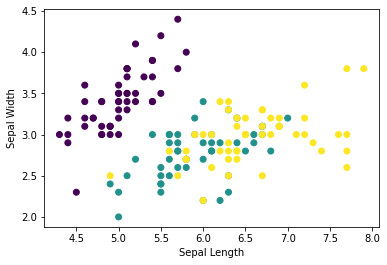

In [7]:
#Plotting real values of Sepal length vs width with a hue of species
plt.scatter(x[:,0], x[:,1], c=y)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

In [8]:
#creating KMeans object with 3 clusters (for 3 species), 300 max iterations.
kmeans = skcl.KMeans(n_clusters=3, max_iter=300)
# Computing the data
kmeans = kmeans.fit(x)
#Getting the labels of the cluster datapoints
labels = kmeans.labels_
#Predict the closest cluster each sample in x belongs to
prediction = kmeans.predict(x)
# The centres of clusters.
center = kmeans.cluster_centers_

Text(0, 0.5, 'Sepal Width')

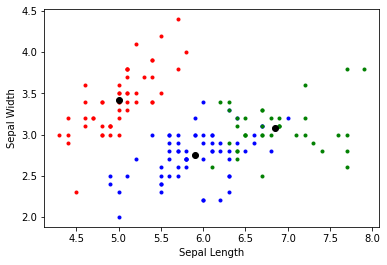

In [9]:
#Identified center of each cluster (in black)
plt.plot(x[prediction == 0][:,0], x[prediction == 0][:,1], 'b.')
plt.plot(x[prediction == 1][:,0], x[prediction == 1][:,1], 'r.')
plt.plot(x[prediction == 2][:,0], x[prediction == 2][:,1], 'g.')
plt.plot(center[:,0], center[:,1], 'ko')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

Text(0.5, 1.0, 'Predicted')

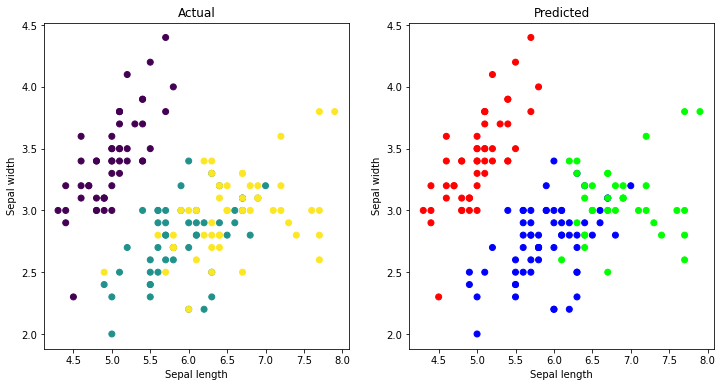

In [10]:
#Comparison
#Code adapted from [3]
fig, axes = plt.subplots(1, 2, figsize=(12,6))
axes[0].scatter(x[:,0], x[:,1], c=y,)
axes[0].set_xlabel('Sepal length')
axes[0].set_ylabel('Sepal width')
axes[0].set_title('Actual')
axes[1].scatter(x[:,0], x[:,1], c=prediction, cmap='brg')
axes[1].set_xlabel('Sepal length')
axes[1].set_ylabel('Sepal width')
axes[1].set_title('Predicted')

#### Classification Report

In [11]:
#Code adapted from [4]

#Scikit classification report from the sklearn.metrics module. 
#Note: data sometimes appears inaccurate due to flipping of cluster labels.
from sklearn.metrics import classification_report

target_names = ['Iris_versicolor', 'Iris_setosa', 'Iris_virginica']

print(classification_report(df['species'],prediction,target_names=target_names))

                 precision    recall  f1-score   support

Iris_versicolor       0.00      0.00      0.00        50
    Iris_setosa       0.00      0.00      0.00        50
 Iris_virginica       0.95      0.72      0.82        50

       accuracy                           0.24       150
      macro avg       0.32      0.24      0.27       150
   weighted avg       0.32      0.24      0.27       150



***

#### Task 4 attempt 2 - k Nearest Neighbours clustering
<br>
The K-Nearest neighbors algorithm is a simple algorithm that is used when trying to classify data.[1] This algorithm is best suited to data that has discrete labels by which it can be categorised.[2] This makes K-Nearest neighbors a supervised machine learning algorithm, one that takes the data associated with a label and uses it to predict an appropriate output when given data with no label. Let's assume we have a new datapoint which we want to classify, the algorithm first measures the Euclidean distance between the point and its 'K-Nearest Neighbours', the K here refers to the number of neighbors that are inspected. The algorithm then chooses a label for this new point based on the majority of neighbours closest to it. Note that the choice for K can have an effect on the classification of data, with lower values being more prone to the effects of outliers.[2] In the example below, We load the numeric columns of the Iris Dataset into the variable inputs, while we place the species category in a variable output. We then initialize a K-Nearest neighbors object and fit the input and output values to this model. When predicting the category of the training data we can see that the algorithm correctly identifies 145/150(96%) of the datapoints it was trained on. To simulate how the algorithm would handle being given an unknown set of Iris flowers we use the sklearn.model_selection.train_test_split function to randomize and split the data into 4 subarrays, 2 for training and 2 for predicting. The results show a high accuracy of prediction at ~48/50 flowers being identified correctly. 


[1] scikit-learn Documentation, sklearn.neighbors.KNeighborsClassifier, https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

[2] scikit-learn Documentation, Nearest Neighbors, https://scikit-learn.org/stable/modules/neighbors.html

[3] scikit-learn Documentation, sklearn.model_selection.train_test_split, https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

[4] GitHub, KNN with Iris, Ian McLoughlin, https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/knn-iris.ipynb

In [12]:
import sklearn.neighbors as nei
from sklearn.model_selection import train_test_split
import pandas as pd

# Load iris data set
df = pd.read_csv("https://github.com/ianmcloughlin/datasets/raw/master/iris.csv")

#subselections of the dataframe, numeric and categorical
inputs = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
outputs = df['class']

#returns back a KNN object, selects 5 nearest neighbors
knn = nei.KNeighborsClassifier(n_neighbors=5)

#Training the model on the real values
knn.fit(inputs, outputs)

KNeighborsClassifier()

#### Accuracy Test

In [13]:
#Predict species of 3 chosen flower measurements.[Setosa, Versicolor, Virginica]
knn.predict([[5.4,3.9,1.7,0.4], [5.7, 2.8, 4.5, 1.3], [6.9, 3.2, 5.7, 2.3]])

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [14]:
#Accuracy when predicting entire base dataset.
print("Accuracy =",(knn.predict(inputs) == outputs).sum(),"/ 150")

Accuracy = 145 / 150


#### Simulate

In [15]:
#Code adapted from [3][4]
#Splits the data into randomized subsets, 100 inputs, 50 inputs, 100 outputs, 50 outputs
x_train, x_test, y_train, y_test = train_test_split( inputs, outputs, test_size=0.33)

#new knn object
knn2 = nei.KNeighborsClassifier(n_neighbors=5)

#Fitting the 100 random inputs and 100 random outputs
knn2.fit(x_train, y_train)

#Asking the algorithm to predict the previously unseen 50 inputs and outputs. 
print("Accuracy =",(knn2.predict(x_test) == y_test).sum(),"/ 50")

Accuracy = 48 / 50


# End